In [1]:
# initiating gpu using tensorflow.
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

Using TensorFlow backend.


In [2]:
#importing libraries for the data processing and model.
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from keras.models import load_model
%matplotlib inline

In [6]:
# defining the path and classes.
directory = '../input/state-farm-distracted-driver-detection/imgs/train'
test_directory = '../input/state-farm-distracted-driver-detection/imgs/test/'
random_test = '../input/driver/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [7]:
# defining a shape to be used for our models.
img_size1 = 240
img_size2 = 240

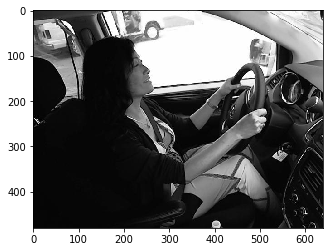

In [8]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

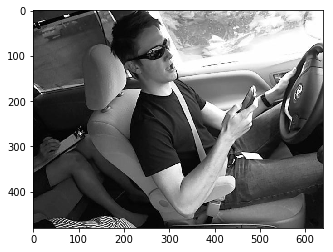

In [9]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
    test_array = img_array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [11]:
# checkking image size using shape.
print(img_array.shape)

(480, 640)


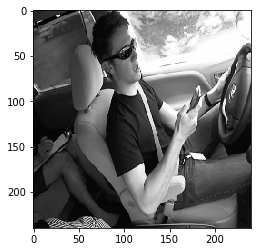

In [12]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()

In [13]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([
                new_img,class_num])

In [14]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,
            new_img])

In [15]:
create_training_data()

In [16]:
create_testing_data()

In [17]:
print(len(training_data))
print(len(testing_data))

22424
79726


In [18]:
random.shuffle(training_data)

In [19]:
x = []
y = []

In [20]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [21]:
x[0].shape

(240, 240)

In [22]:
len(x)

22424

In [26]:
#X  = np.array(x[1]).reshape(-1,img_size2,img_size1,1)
#i = 1
#for i in range(len(x)):
X = np.array(x).reshape(-1,img_size2,img_size1,1)
#    X = np.append(X,Y,axis = 0)
X.shape,X[0].shape

((22424, 240, 240, 1), (240, 240, 1))

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [28]:
Y_train = np_utils.to_categorical(y_train,num_classes=10)
Y_test = np_utils.to_categorical(y_test,num_classes=10)

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [31]:
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [32]:
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [33]:
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 119, 119, 64)      18496     
__________

In [35]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [36]:
callbacks = [EarlyStopping(monitor='val_acc',patience=5)]

In [37]:
batch_size = 50
n_epochs = 20

In [38]:
results = model.fit(x_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test,Y_test),callbacks=callbacks)

Train on 15696 samples, validate on 6728 samples
Epoch 1/20
15696/15696 [==============================] - 88s 6ms/step - loss: 0.7646 - acc: 0.7599 - val_loss: 0.1243 - val_acc: 0.9636
Epoch 2/20
15696/15696 [==============================] - 73s 5ms/step - loss: 0.1492 - acc: 0.9538 - val_loss: 0.0719 - val_acc: 0.9810
Epoch 3/20
15696/15696 [==============================] - 73s 5ms/step - loss: 0.0752 - acc: 0.9763 - val_loss: 0.0473 - val_acc: 0.9887
Epoch 4/20
15696/15696 [==============================] - 73s 5ms/step - loss: 0.0613 - acc: 0.9804 - val_loss: 0.0612 - val_acc: 0.9822
Epoch 5/20
15696/15696 [==============================] - 73s 5ms/step - loss: 0.0458 - acc: 0.9844 - val_loss: 0.2181 - val_acc: 0.9429
Epoch 6/20
15696/15696 [==============================] - 73s 5ms/step - loss: 0.0528 - acc: 0.9832 - val_loss: 0.0264 - val_acc: 0.9944
Epoch 7/20
15696/15696 [==============================] - 73s 5ms/step - loss: 0.0355 - acc: 0.9874 - val_loss: 0.0361 - val_acc:

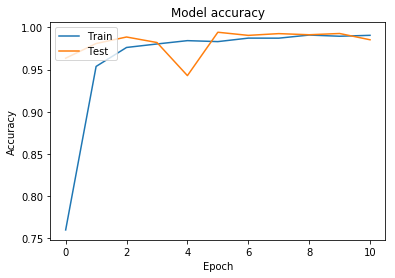

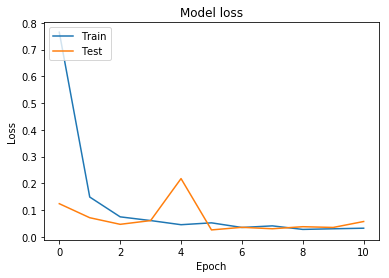

In [39]:
# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
preds = model.predict(np.array(testing_data[0][1]).reshape(-1,img_size2,img_size1,1))

In [41]:
model.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)

In [42]:
model.save('./driverdistraction_lr_weights.h5')

In [ ]:
loaded_model = load_model('../input/driver-distraction/driverdistraction_lr_weights.h5')

In [58]:
test_data = np.array(testing_data[1001][1]).reshape(-1,img_size2,img_size1,1)

In [59]:
preds = model.predict(test_data)
preds= np.argmax(preds)
preds

5

In [54]:


classes = {0: "safe driving",
1: "texting - right",
2: "talking on the phone - right",
3: "texting - left",
4: "talking on the phone - left",
5: "operating the radio",
6: "drinking",
7: "reaching behind",
8: "hair and makeup",
9: "talking to passenger",
}


for key,value in classes.items():
    if preds==key:
        predicted = value

predicted     

'operating the radio'

operating the radio


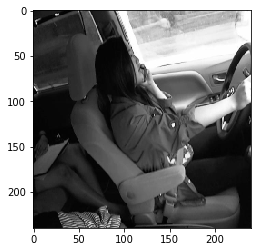

In [61]:
print(predicted)
new_img = cv2.resize(testing_data[1001][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()


    c0: safe driving
    c1: texting - right
    c2: talking on the phone - right
    c3: texting - left
    c4: talking on the phone - left
    c5: operating the radio
    c6: drinking
    c7: reaching behind
    c8: hair and makeup
    c9: talking to passenger


In [ ]:
def create_submission(predictions, test_id, info):
    result1 = pd.DataFrame(predictions, columns=['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])
    result1.loc[:, 'img'] = pd.Series(test_id, index=result1.index)
    now = datetime.datetime.now()
    if not os.path.isdir('subm'):
        os.mkdir('subm')
    suffix = info + '_' + str(now.strftime("%Y-%m-%d-%H-%M"))
    sub_file = os.path.join('subm', 'submission_' + suffix + '.csv')
    result1.to_csv(sub_file, index=False)